# Credit Card Approval Prediction  

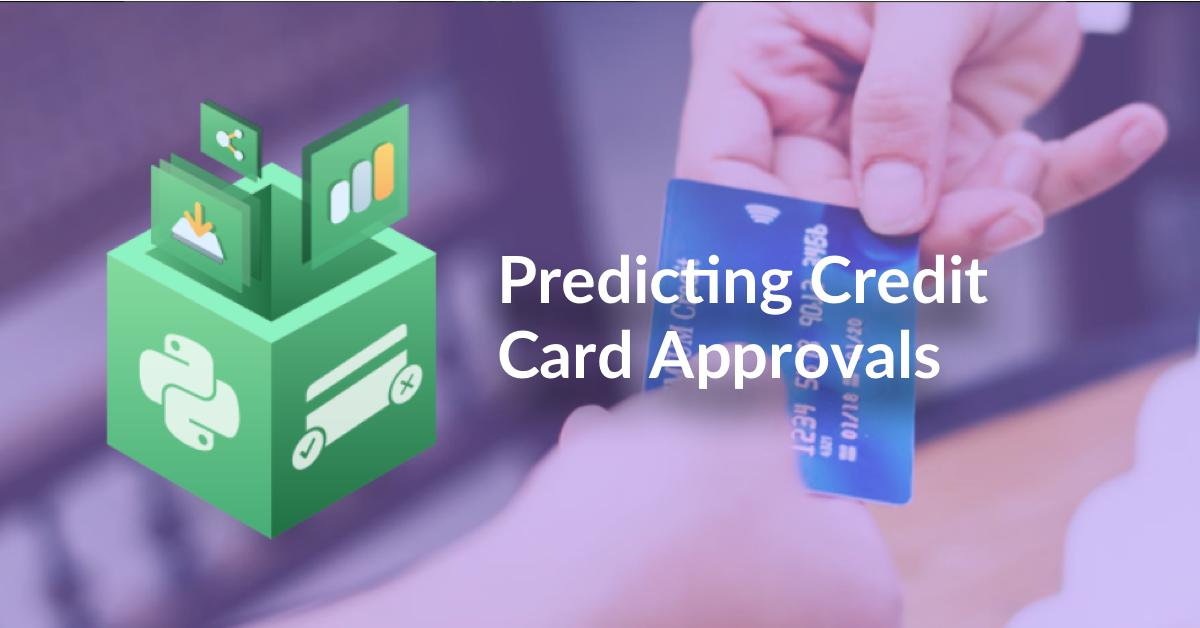

1. ID: Unique Id of the row  
2. CODE_GENDER: Gender of the applicant. M is male and F is female.  
3. FLAG_OWN_CAR: Is an applicant with a car. Y is Yes and N is NO.  
4. FLAG_OWN_REALTY: Is an applicant with realty. Y is Yes and N is No.  
5. CNT_CHILDREN: Count of children.  
6. AMT_INCOME_TOTAL: the amount of the income.  
7. NAME_INCOME_TYPE: The type of income (5 types in total).  
8. NAME_EDUCATION_TYPE: The type of education (5 types in total).  
9. NAME_FAMILY_STATUS: The type of family status (6 types in total).  
10. DAYS_BIRTH: The number of the days from birth (Negative values).  
11. DAYS_EMPLOYED: The number of the days from employed (Negative values). This column has error values.  
12. FLAG_MOBIL: Is an applicant with a mobile. 1 is True and 0 is False.  
13. FLAG_WORK_PHONE: Is an applicant with a work phone. 1 is True and 0 is False.  
14. FLAG_PHONE: Is an applicant with a phone. 1 is True and 0 is False.    
15. FLAG_EMAIL: Is an applicant with a email. 1 is True and 0 is False.  
16. OCCUPATION_TYPE: The type of occupation (19 types in total). This column has missing values.  
17. CNT_FAM_MEMBERS: The count of family members.  
 
 

This is a csv file with credit record for a part of ID in application record. We can treat it a file to generate labels for modeling. For the applicants who have a record more than 59 past due, they should be rejected.
 
After reading the data, we have the following columns.
 
1. ID: Unique Id of the row in application record.
2. MONTHS_BALANCE: The number of months from record time.
3. STATUS: Credit status for this month.  
  X: No loan for the month  
  C: paid off that month   
  0: 1-29 days past due   
  1: 30-59 days past due   
  2: 60-89 days overdue  
  3: 90-119 days overdue   
  4: 120-149 days overdue   
  5: Overdue or bad debts, write-offs for more than 150 days   

In [11]:
!pip install missingno

In [12]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd 
# data processing, CSV file I/O (e.g. pd.read_csv)
 
#visualization libraries
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
 
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo
from plotly import tools
import seaborn as sns
import missingno as msno 
#for visualizing missing data

In [13]:
data = pd.read_csv(r"D:\application_record.csv")
data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [14]:
data.describe(include="all")

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
count,4.385570e+05,438557,438557,438557,438557.000000,4.385570e+05,438557,438557,438557,438557,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,304354,438557.000000
unique,NaN,2,2,2,NaN,NaN,5,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN
top,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN
freq,NaN,294440,275459,304074,NaN,NaN,226104,301821,299828,393831,NaN,NaN,NaN,NaN,NaN,NaN,78240,NaN
mean,6.022176e+06,NaN,NaN,NaN,0.427390,1.875243e+05,NaN,NaN,NaN,NaN,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,NaN,2.194465
std,5.716370e+05,NaN,NaN,NaN,0.724882,1.100869e+05,NaN,NaN,NaN,NaN,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,NaN,0.897207
min,5.008804e+06,NaN,NaN,NaN,0.000000,2.610000e+04,NaN,NaN,NaN,NaN,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,NaN,1.000000
25%,5.609375e+06,NaN,NaN,NaN,0.000000,1.215000e+05,NaN,NaN,NaN,NaN,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000
50%,6.047745e+06,NaN,NaN,NaN,0.000000,1.607805e+05,NaN,NaN,NaN,NaN,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000
75%,6.456971e+06,NaN,NaN,NaN,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,NaN,3.000000


In [15]:
print("Number of datapoints for application records: {}".format(len(data)))
print("Number of unique clients in dataset: {}".format(len(data.ID.unique())))

Number of datapoints for application records: 438557
Number of unique clients in dataset: 438510


The number of application records & the unique ID's are not same which depicts the values must be duplicated.

In [16]:
records = pd.read_csv(r"D:\credit_record.csv")
records

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [17]:
records.describe(include="all")

,ID,MONTHS_BALANCE,STATUS
count,1.048575e+06,1.048575e+06,1048575
unique,NaN,NaN,8
top,NaN,NaN,C
freq,NaN,NaN,442031
mean,5.068286e+06,-1.913700e+01,NaN
std,4.615058e+04,1.402350e+01,NaN
min,5.001711e+06,-6.000000e+01,NaN
25%,5.023644e+06,-2.900000e+01,NaN
50%,5.062104e+06,-1.700000e+01,NaN
75%,5.113856e+06,-7.000000e+00,NaN


In [18]:
print("Number of datapoints for credit records: {}".format(len(records)))
print("Number of unique clients in dataset: {}".format(len(records.ID.unique())))

Number of datapoints for credit records: 1048575
Number of unique clients in dataset: 45985


### Before removing duplicated data

In [19]:
len(set(records["ID"]).intersection(set(data["ID"])))

36457

The number of unique id's in the two datasets is not equal.There are fewer customers than applications in the credit record dataset.The intersection is 36,457 customers.

### After removing duplicated data

In [20]:
data.duplicated().sum()

0

In [21]:
data.iloc[:,1:].duplicated().sum()

348472

In [22]:
print(f'Duplicates in applications data: {data.iloc[:,1:].duplicated().sum()}, ({np.round(100*data.iloc[:,1:].duplicated().sum()/len(data),1)}%)')
print('')
print(f'Duplicates in records data: {records.duplicated().sum()}, ({np.round(100*records.duplicated().sum()/len(records),1)}%)')

Duplicates in applications data: 348472, (79.5%)

Duplicates in records data: 0, (0.0%)


### Drop duplicates

In [23]:
# Drop duplicates
data = data.drop_duplicates(subset=data.columns[1:], keep="first")

In [24]:
data.shape

(90085, 18)

In [25]:
len(set(records["ID"]).intersection(set(data["ID"])))

9709

The number of unique id's in the two datasets is not equal.There are fewer customers than applications in the credit record dataset.The intersection is 9709 customers.

### Finding the CArdinality in the data
##### Cardinality refers to the distinctiveness or uniqueness of values in a dataset or database column.
##### It represents the number of unique values in a column or a set of columns.

In [26]:
for col in data.columns:
    print(col,data[col].nunique())

ID 90085
CODE_GENDER 2
FLAG_OWN_CAR 2
FLAG_OWN_REALTY 2
CNT_CHILDREN 12
AMT_INCOME_TOTAL 866
NAME_INCOME_TYPE 5
NAME_EDUCATION_TYPE 5
NAME_FAMILY_STATUS 5
NAME_HOUSING_TYPE 6
DAYS_BIRTH 16379
DAYS_EMPLOYED 9406
FLAG_MOBIL 1
FLAG_WORK_PHONE 2
FLAG_PHONE 2
FLAG_EMAIL 2
OCCUPATION_TYPE 18
CNT_FAM_MEMBERS 13


In [27]:
[(col,data[col].nunique()) for col in data.columns]

[('ID', 90085),
 ('CODE_GENDER', 2),
 ('FLAG_OWN_CAR', 2),
 ('FLAG_OWN_REALTY', 2),
 ('CNT_CHILDREN', 12),
 ('AMT_INCOME_TOTAL', 866),
 ('NAME_INCOME_TYPE', 5),
 ('NAME_EDUCATION_TYPE', 5),
 ('NAME_FAMILY_STATUS', 5),
 ('NAME_HOUSING_TYPE', 6),
 ('DAYS_BIRTH', 16379),
 ('DAYS_EMPLOYED', 9406),
 ('FLAG_MOBIL', 1),
 ('FLAG_WORK_PHONE', 2),
 ('FLAG_PHONE', 2),
 ('FLAG_EMAIL', 2),
 ('OCCUPATION_TYPE', 18),
 ('CNT_FAM_MEMBERS', 13)]

In [28]:
unique_counts = pd.DataFrame.from_records([(col,data[col].nunique()) for col in data.columns],
                                         columns=["Column_Name","Num_Unique"]).sort_values(by=["Num_Unique"])
unique_counts

,Column_Name,Num_Unique
12,FLAG_MOBIL,1
1,CODE_GENDER,2
2,FLAG_OWN_CAR,2
3,FLAG_OWN_REALTY,2
15,FLAG_EMAIL,2
14,FLAG_PHONE,2
13,FLAG_WORK_PHONE,2
8,NAME_FAMILY_STATUS,5
6,NAME_INCOME_TYPE,5
7,NAME_EDUCATION_TYPE,5


In [29]:
unique_counts = pd.DataFrame.from_records([(col,records[col].nunique()) for col in records.columns],
                                         columns=["Column_Name","Num_Unique"]).sort_values(by=["Num_Unique"])
unique_counts

,Column_Name,Num_Unique
2,STATUS,8
1,MONTHS_BALANCE,61
0,ID,45985


In [30]:
data["FLAG_MOBIL"].unique()

array([1], dtype=int64)

From the above observations it was obseved that "FLAG_MOBIL" is having only one value in the entire column which indicates that there is a singularity in the data particular column.So this values are going to be the same no matter whichever 

In [31]:
data.drop(["FLAG_MOBIL"],axis=1,inplace=True)

In [32]:
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,0,0,0,NaN,1.0
10,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,Accountants,2.0


In [33]:
data.shape

(90085, 17)

### Handling Missing Values

Missing values can pose challenges when working with data as they can affect data integrity, accuracy and validaty of analysis or modeling results.
It is important to handel missing values appropriately in order to avoid biased or incomplete

In [34]:
data.isnull().sum()/len(data)*100

ID                      0.000000
CODE_GENDER             0.000000
FLAG_OWN_CAR            0.000000
FLAG_OWN_REALTY         0.000000
CNT_CHILDREN            0.000000
AMT_INCOME_TOTAL        0.000000
NAME_INCOME_TYPE        0.000000
NAME_EDUCATION_TYPE     0.000000
NAME_FAMILY_STATUS      0.000000
NAME_HOUSING_TYPE       0.000000
DAYS_BIRTH              0.000000
DAYS_EMPLOYED           0.000000
FLAG_WORK_PHONE         0.000000
FLAG_PHONE              0.000000
FLAG_EMAIL              0.000000
OCCUPATION_TYPE        30.501193
CNT_FAM_MEMBERS         0.000000
dtype: float64

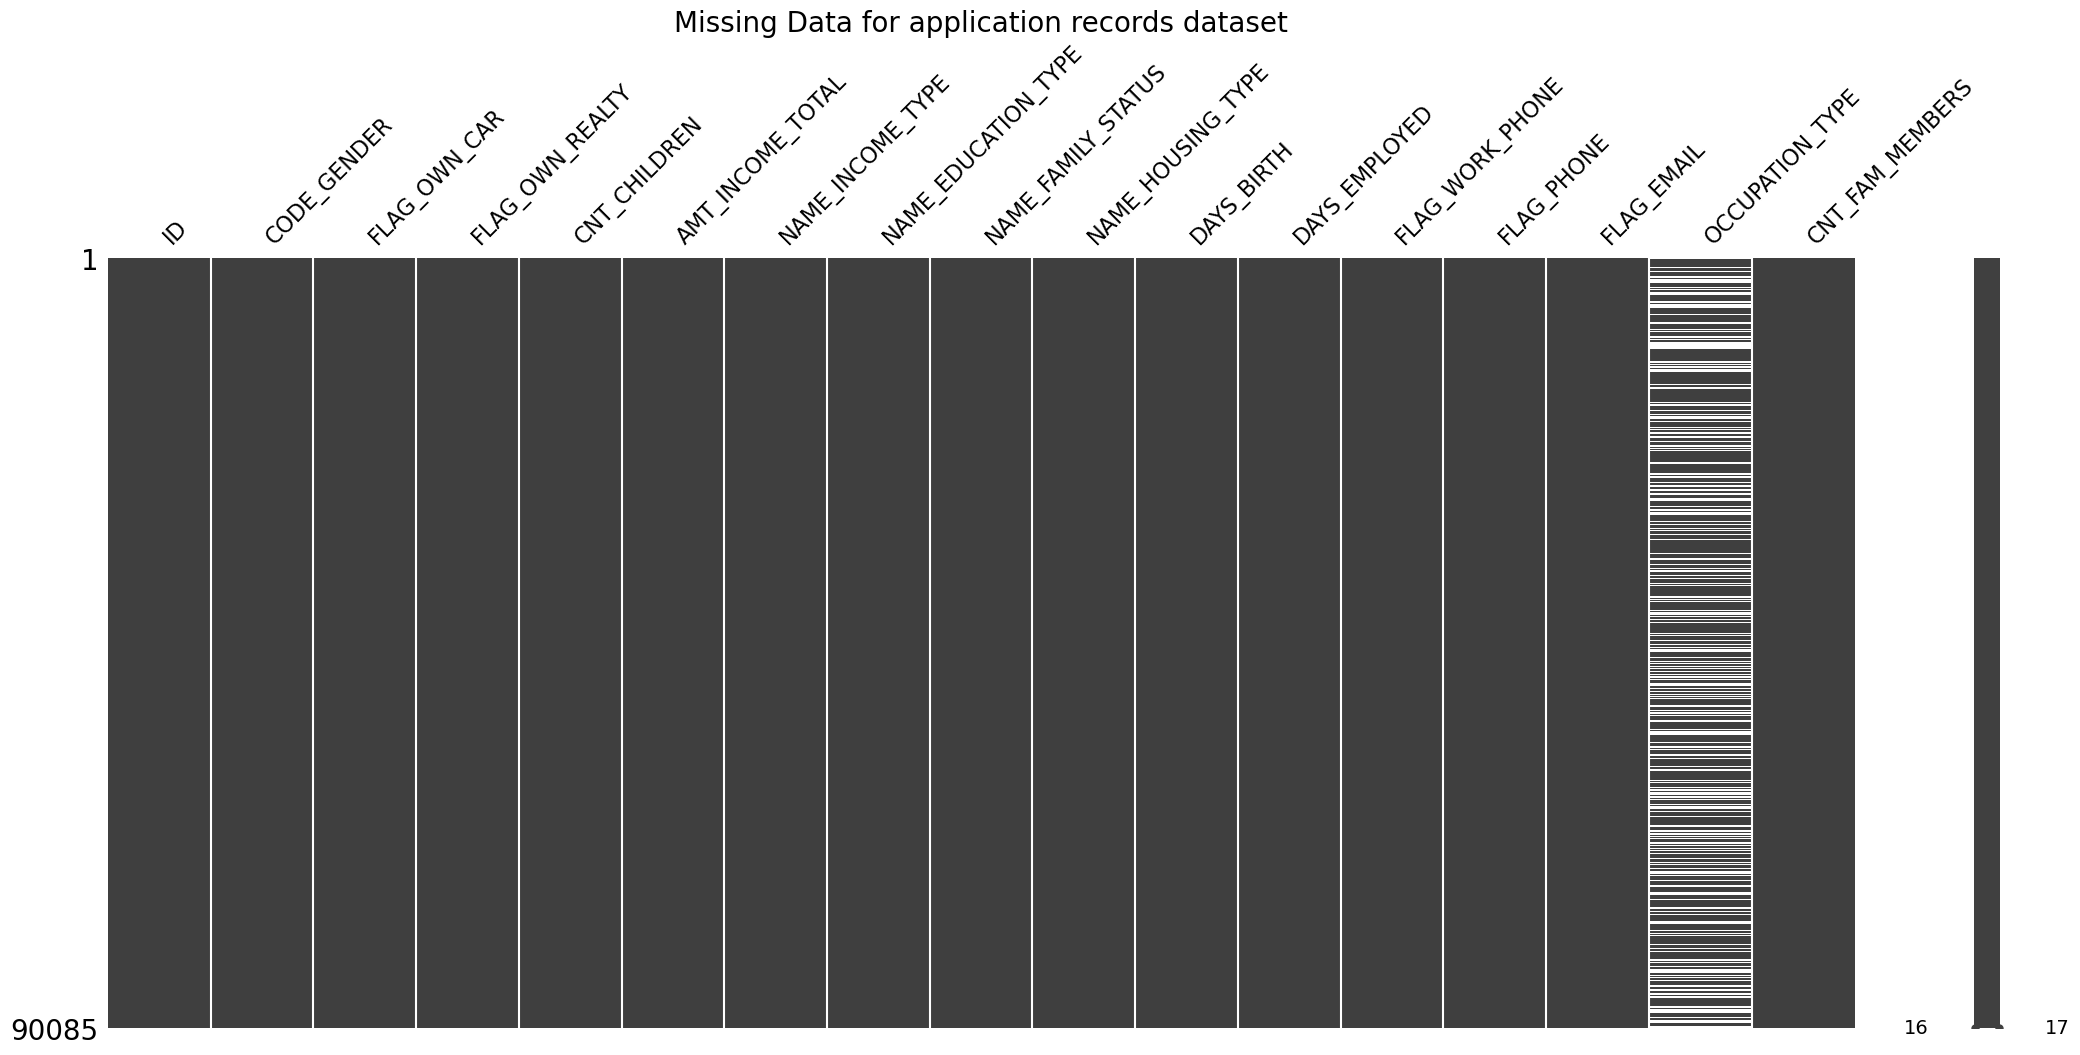

In [35]:
missing = msno.matrix(data)
missing.set_title("Missing Data for application records dataset",fontsize=20);

As we can observe from above that "" is the only column from applicatins data having large set of missing values.Appropriate handling of missing values can help ensure the integrity 

In [36]:
records.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

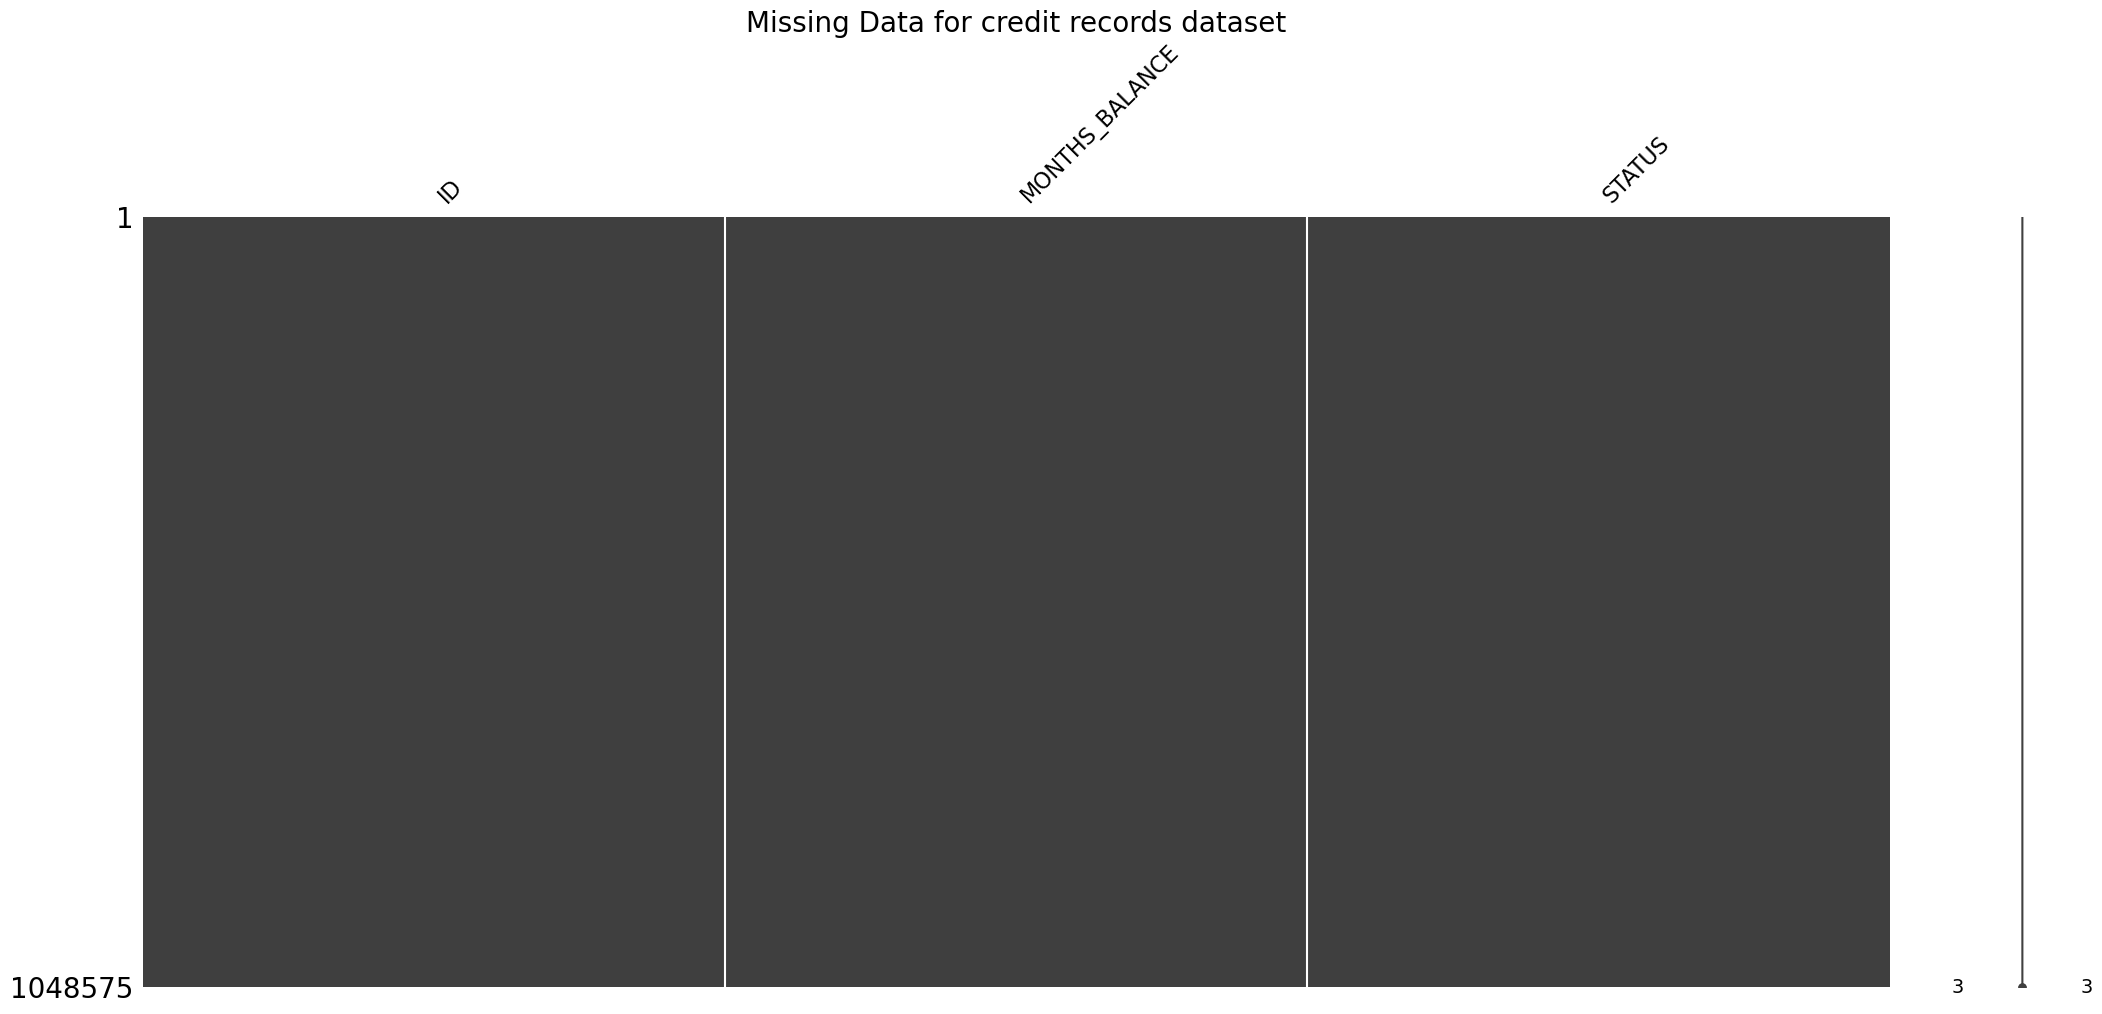

In [37]:
missing = msno.matrix(records)
missing.set_title("Missing Data for credit records dataset",fontsize=20);

In [38]:
data["OCCUPATION_TYPE"].value_counts()

OCCUPATION_TYPE
Laborers                 16624
Sales staff               9123
Core staff                8091
Managers                  6675
Drivers                   5860
High skill tech staff     3357
Accountants               3034
Medicine staff            2484
Cooking staff             1764
Security staff            1740
Cleaning staff            1222
Private service staff      750
Low-skill Laborers         569
Secretaries                412
Waiters/barmen staff       393
Realty agents              218
HR staff                   167
IT staff                   125
Name: count, dtype: int64

In [39]:
# Fill missing values
data["OCCUPATION_TYPE"].fillna(value="Other",inplace=True)

As dropping the missing values completely can lead to huge data loss.So instead of dropping we will try to fill the missing values as "Other".So the data loss can also be prevented & missing values will also get handled appeopriately.

In [40]:
data.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

In [41]:
records.STATUS.value_counts()

STATUS
C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: count, dtype: int64

### Converting data in proper format

In [42]:
records.dtypes

ID                 int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object

In [43]:
# target=1 (high risk) if there is at least
#one month where user is late on payments by 30 days or more

records["target"]=records["STATUS"]
records["target"].replace("X",0,inplace=True)
records["target"].replace("C",0,inplace=True)
records["target"]=records["target"].astype(int)
records.loc[records["target"]>=1,"target"] = 1
records["target"].value_counts()

target
0    1034381
1      14194
Name: count, dtype: int64

In [44]:
print("Number of datapoints for credit records: {}".format(len(records)))
print("Number of unique clients in dataset: {}".format(len(records.ID.unique())))

Number of datapoints for credit records: 1048575
Number of unique clients in dataset: 45985


In [45]:
records.head(20)

,ID,MONTHS_BALANCE,STATUS,target
0,5001711,0,X,0
1,5001711,-1,0,0
2,5001711,-2,0,0
3,5001711,-3,0,0
4,5001712,0,C,0
5,5001712,-1,C,0
6,5001712,-2,C,0
7,5001712,-3,C,0
8,5001712,-4,C,0
9,5001712,-5,C,0


In [46]:
df=pd.DataFrame(records.groupby(["ID"])["target"].agg(max)).reset_index()

In [47]:
df.head()

,ID,target
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0


In [48]:
df.target.value_counts()

target
0    40635
1     5350
Name: count, dtype: int64

In [49]:
new_df=pd.merge(data, df, how='inner', on=["ID"])

In [50]:
new_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,1
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0,0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,0,0,0,Other,1.0,0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,Accountants,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,-20600,-198,0,0,0,Laborers,2.0,1
9705,5149055,F,N,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15837,-2694,1,1,0,Other,2.0,1
9706,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-19101,-1721,0,0,0,Other,2.0,1
9707,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,0,1,1,Medicine staff,2.0,1


In [51]:
new_df.shape

(9709, 18)

In [52]:
# Extracting how many months account has been open for
start_df=pd.DataFrame(records.groupby(["ID"])["MONTHS_BALANCE"].agg(min)).reset_index()
start_df
#Rename column
start_df.rename(columns={"MONTHS_BALANCE":"ACCOUNT_LENGTH"},inplace=True)
start_df
#Make entires positive
start_df["ACCOUNT_LENGTH"]=-start_df["ACCOUNT_LENGTH"]
start_df

,ID,ACCOUNT_LENGTH
0,5001711,3
1,5001712,18
2,5001713,21
3,5001714,14
4,5001715,59
...,...,...
45980,5150482,28
45981,5150483,17
45982,5150484,12
45983,5150485,1


In [53]:
new_df=pd.merge(new_df,start_df,how="inner", on=["ID"])

In [54]:
new_df.shape

(9709, 19)

In [55]:
new_df.describe(include="all")

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,ACCOUNT_LENGTH
count,9.709000e+03,9709,9709,9709,9709.000000,9.709000e+03,9709,9709,9709,9709,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709,9709.000000,9709.000000,9709.000000
unique,NaN,2,2,2,NaN,NaN,5,5,5,6,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN
top,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,Other,NaN,NaN,NaN
freq,NaN,6323,6139,6520,NaN,NaN,4960,6761,6530,8684,NaN,NaN,NaN,NaN,NaN,2994,NaN,NaN,NaN
mean,5.076105e+06,NaN,NaN,NaN,0.422804,1.812282e+05,NaN,NaN,NaN,NaN,-15991.811618,61732.846328,0.217427,0.287671,0.087548,NaN,2.182614,0.132145,27.270059
std,4.080270e+04,NaN,NaN,NaN,0.767019,9.927731e+04,NaN,NaN,NaN,NaN,4246.224468,139656.322958,0.412517,0.452700,0.282650,NaN,0.932918,0.338666,16.648057
min,5.008804e+06,NaN,NaN,NaN,0.000000,2.700000e+04,NaN,NaN,NaN,NaN,-25152.000000,-15713.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000
25%,5.036955e+06,NaN,NaN,NaN,0.000000,1.125000e+05,NaN,NaN,NaN,NaN,-19565.000000,-2995.000000,0.000000,0.000000,0.000000,NaN,2.000000,0.000000,13.000000
50%,5.069449e+06,NaN,NaN,NaN,0.000000,1.575000e+05,NaN,NaN,NaN,NaN,-15611.000000,-1374.000000,0.000000,0.000000,0.000000,NaN,2.000000,0.000000,26.000000
75%,5.112986e+06,NaN,NaN,NaN,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,-12440.000000,-339.000000,0.000000,1.000000,0.000000,NaN,3.000000,0.000000,41.000000


In [56]:
data["DAYS_BIRTH"]

0        -12005
2        -21474
3        -19110
7        -22464
10       -16872
          ...  
438541   -13510
438545   -18832
438547   -10966
438552   -22717
438553   -15939
Name: DAYS_BIRTH, Length: 90085, dtype: int64

As you can see that "DAYS_BIRTH" column is giving the information about the age of individual but here its not in a proper 
form to make it more understandable.

In [57]:
#Create age Feature
new_df["AGE_YEARS"]=round(-new_df["DAYS_BIRTH"]/365.2425,0)
#The number 365.2425 is used because it represents the average lenght of a tropical year,
#which is the time it takes for the earth to complete one orbit around the sun.

In [58]:
new_df["AGE_YEARS"].head()

0    33.0
1    59.0
2    52.0
3    62.0
4    46.0
Name: AGE_YEARS, dtype: float64

AS now we have converted the "DAYS_BIRTH" Columns into a proper & named it as "AGE_YEARS". So now both are somewhat sharing same set of information in the data. SO we will drop out the "DAYS_BIRTH" for betterment of the data.

In [59]:
new_df.drop(["DAYS_BIRTH"],axis=1, inplace=True)
new_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,ACCOUNT_LENGTH,AGE_YEARS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,0,0,Other,2.0,1,15,33.0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134,0,0,0,Security staff,2.0,0,29,59.0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,0,1,1,Sales staff,1.0,0,4,52.0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,365243,0,0,0,Other,1.0,0,20,62.0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-769,1,1,1,Accountants,2.0,0,5,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,-198,0,0,0,Laborers,2.0,1,20,56.0
9705,5149055,F,N,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-2694,1,1,0,Other,2.0,1,19,43.0
9706,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-1721,0,0,0,Other,2.0,1,21,52.0
9707,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-1325,0,1,1,Medicine staff,2.0,1,32,34.0


In [60]:
new_df["DAYS_EMPLOYED"]

0        -4542
1        -1134
2        -3051
3       365243
4         -769
         ...  
9704      -198
9705     -2694
9706     -1721
9707     -1325
9708     -1193
Name: DAYS_EMPLOYED, Length: 9709, dtype: int64

In [61]:
n_df = new_df.loc[-new_df["DAYS_EMPLOYED"]<0]
n_df["NAME_INCOME_TYPE"].value_counts()

NAME_INCOME_TYPE
Pensioner    1696
Name: count, dtype: int64

In [62]:
#Create unemployes indicator
new_df["UNEMPLOYED"]=0
new_df.loc[-new_df["DAYS_EMPLOYED"]<0,"UNEMPLOYED"]

3       0
16      0
24      0
34      0
40      0
       ..
9681    0
9682    0
9686    0
9687    0
9701    0
Name: UNEMPLOYED, Length: 1696, dtype: int64

In [63]:
new_df.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,ACCOUNT_LENGTH,AGE_YEARS,UNEMPLOYED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,0,0,Other,2.0,1,15,33.0,0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134,0,0,0,Security staff,2.0,0,29,59.0,0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,0,1,1,Sales staff,1.0,0,4,52.0,0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,365243,0,0,0,Other,1.0,0,20,62.0,0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-769,1,1,1,Accountants,2.0,0,5,46.0,0
5,5008819,M,Y,Y,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-1194,0,0,0,Laborers,2.0,0,17,49.0,0
6,5008825,F,Y,N,0,130500.0,Working,Incomplete higher,Married,House / apartment,-1103,0,0,0,Accountants,2.0,1,25,29.0,0
7,5008830,F,N,Y,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,-1469,0,1,0,Laborers,2.0,1,31,27.0,0
8,5008834,F,N,Y,1,112500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-1620,0,0,0,Other,2.0,0,44,30.0,0
9,5008836,M,Y,Y,3,270000.0,Working,Secondary / secondary special,Married,House / apartment,-1163,0,0,0,Laborers,5.0,0,24,35.0,0


In [64]:
#Create years employed features
new_df["YEARS_EMPLOYED"]=round(-new_df["DAYS_EMPLOYED"]/365.2425,1)
new_df.loc[new_df["YEARS_EMPLOYED"]<0,"YEARS_EMPLOYED"]=0

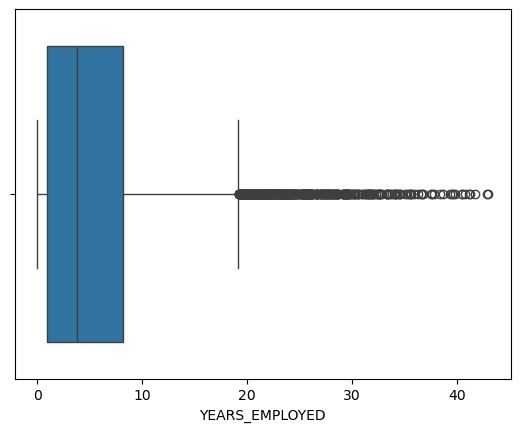

In [65]:
sns.boxplot(data=new_df, x = "YEARS_EMPLOYED");

In [66]:
pd.set_option("Display.max_columns",None)

In [67]:
#new_df["YEARS_EMPLOYED"]
new_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,ACCOUNT_LENGTH,AGE_YEARS,UNEMPLOYED,YEARS_EMPLOYED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,0,0,Other,2.0,1,15,33.0,0,12.4
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134,0,0,0,Security staff,2.0,0,29,59.0,0,3.1
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,0,1,1,Sales staff,1.0,0,4,52.0,0,8.4
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,365243,0,0,0,Other,1.0,0,20,62.0,0,0.0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-769,1,1,1,Accountants,2.0,0,5,46.0,0,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,-198,0,0,0,Laborers,2.0,1,20,56.0,0,0.5
9705,5149055,F,N,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-2694,1,1,0,Other,2.0,1,19,43.0,0,7.4
9706,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-1721,0,0,0,Other,2.0,1,21,52.0,0,4.7
9707,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-1325,0,1,1,Medicine staff,2.0,1,32,34.0,0,3.6


As now we have converted the "DAYS_EMPLOYED columns into a proper format & named it as "YEARS_EMPLOYED" so now both are somewhat same so we try to drop the "DAYS_EMPLOYED" columns

In [68]:
new_df.drop(["DAYS_EMPLOYED"],axis=1, inplace=True)
new_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,ACCOUNT_LENGTH,AGE_YEARS,UNEMPLOYED,YEARS_EMPLOYED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Other,2.0,1,15,33.0,0,12.4
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2.0,0,29,59.0,0,3.1
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1.0,0,4,52.0,0,8.4
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,0,0,0,Other,1.0,0,20,62.0,0,0.0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,1,1,1,Accountants,2.0,0,5,46.0,0,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,0,0,0,Laborers,2.0,1,20,56.0,0,0.5
9705,5149055,F,N,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,1,0,Other,2.0,1,19,43.0,0,7.4
9706,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Other,2.0,1,21,52.0,0,4.7
9707,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,0,1,1,Medicine staff,2.0,1,32,34.0,0,3.6


In [69]:
new_df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'target', 'ACCOUNT_LENGTH', 'AGE_YEARS', 'UNEMPLOYED',
       'YEARS_EMPLOYED'],
      dtype='object')

In [70]:
new_df = new_df.rename(columns={'CODE_GENDER': 'Gender', 'FLAG_OWN_CAR': 'Own_car',
                               'FLAG_OWN_REALTY':'Own_property','CNT_CHILDREN':'Num_children',
                               'AMT_INCOME_TOTAL':'Total_income','NAME_INCOME_TYPE':'Income_type',
                               'NAME_EDUCATION_TYPE':'Education_type','NAME_FAMILY_STATUS':'Family_status',
                               'NAME_HOUSING_TYPE':'Housing_type','FLAG_WORK_PHONE':'Work_phone',
                               'FLAG_PHONE':'Phone','FLAG_EMAIL':'Email','OCCUPATION_TYPE':'Occupation_type',
                               'CNT_FAM_MEMBERS':'Num_family','target':'Target','ACCOUNT_LENGTH':'Account_length',
                                'AGE_YEARS':'Age','UNEMPLOYED':'Unemployed','YEARS_EMPLOYED':'Years_employed'})

In [71]:
new_df.columns

Index(['ID', 'Gender', 'Own_car', 'Own_property', 'Num_children',
       'Total_income', 'Income_type', 'Education_type', 'Family_status',
       'Housing_type', 'Work_phone', 'Phone', 'Email', 'Occupation_type',
       'Num_family', 'Target', 'Account_length', 'Age', 'Unemployed',
       'Years_employed'],
      dtype='object')

In [72]:
len(new_df.columns)

20

In [73]:
new_df.dtypes

ID                   int64
Gender              object
Own_car             object
Own_property        object
Num_children         int64
Total_income       float64
Income_type         object
Education_type      object
Family_status       object
Housing_type        object
Work_phone           int64
Phone                int64
Email                int64
Occupation_type     object
Num_family         float64
Target               int32
Account_length       int64
Age                float64
Unemployed           int64
Years_employed     float64
dtype: object

In [74]:
sns.set_context("notebook",font_scale=.7,rc={"grid.linewidth": 0.1,'patch.linewidth': 0.0,
    "axes.grid":True,
    "grid.linestyle": "-",
    "axes.titlesize" : 13,
    "figure.autolayout":True})
 
palette_1 = ['#FF5E5B','#EC9B9A','#00CECB','#80DE99','#C0E680','#FFED66']
 
sns.set_palette(sns.color_palette(sns.color_palette(palette_1)))

<Figure size 1000x1000 with 0 Axes>

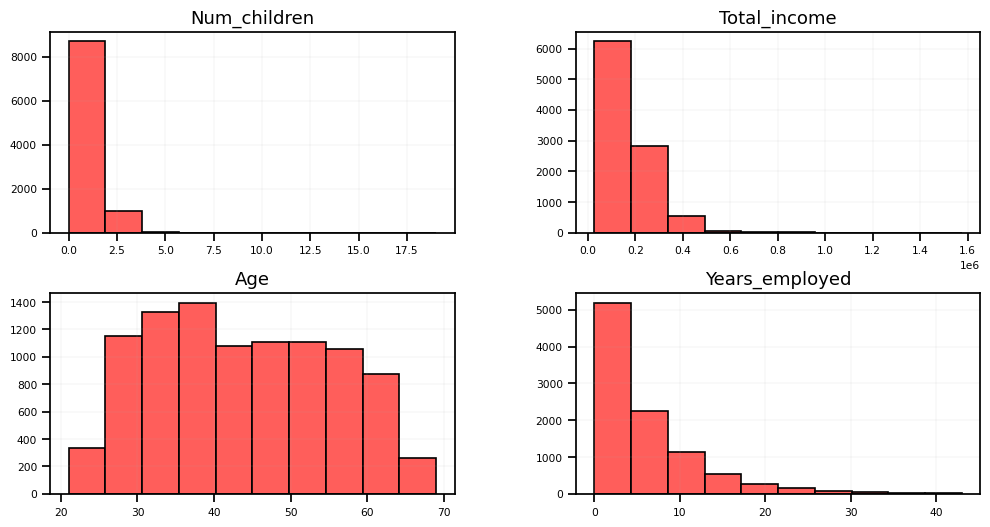

In [75]:
plt.figure(figsize=(10,10))

cols_to_plot = ["Num_children","Total_income","Age","Years_employed"]
new_df[cols_to_plot].hist(edgecolor="black",linewidth=1.2)
fig=plt.gcf() #gcf get current figure
fig.set_size_inches(12,6)

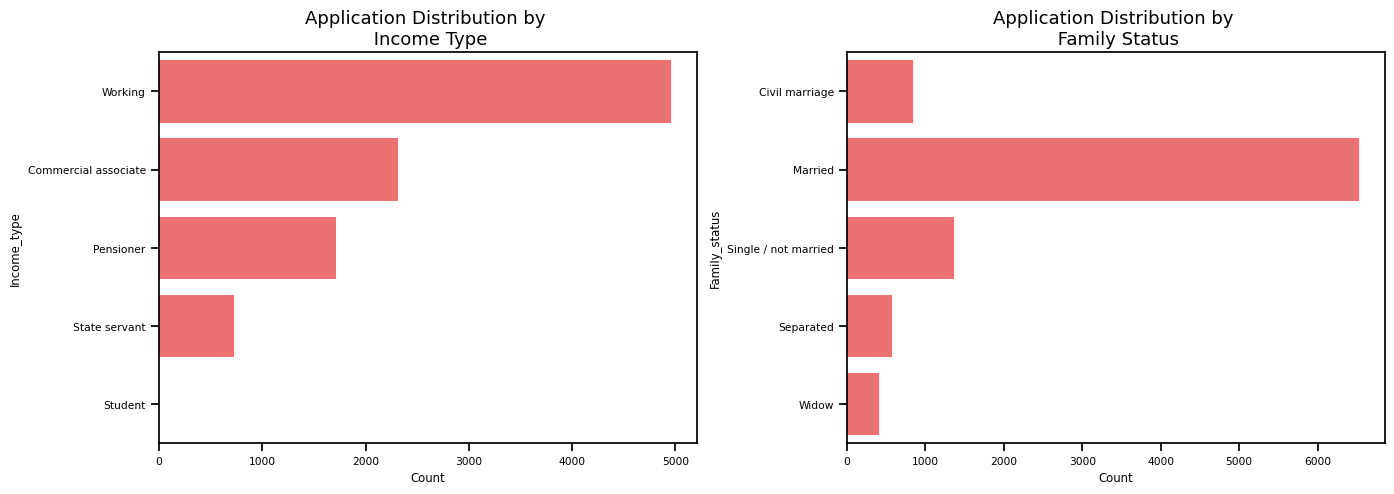

In [76]:
#subplots means one plot with other plots besides with each other
fig, axes = plt.subplots(1,2)

g1=sns.countplot(y=new_df.Income_type, linewidth=1.2, ax=axes[0])
g1.set_title("Application Distribution by \n Income Type")
g1.set_xlabel("Count")


g1=sns.countplot(y=new_df.Family_status, linewidth=1.2, ax=axes[1])
g1.set_title("Application Distribution by \n Family Status")
g1.set_xlabel("Count")

fig.set_size_inches(14,5)

plt.tight_layout()

plt.show()

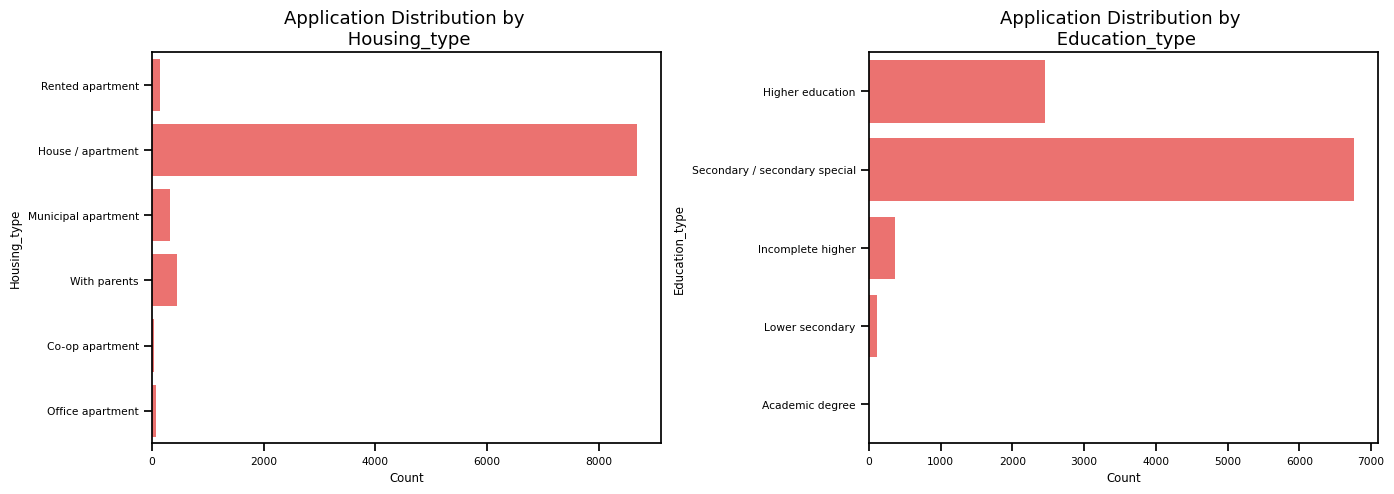

In [77]:
#subplots means one plot with other plots besides with each other
fig, axes = plt.subplots(1,2)

g1=sns.countplot(y=new_df.Housing_type, linewidth=1.2, ax=axes[0])
g1.set_title("Application Distribution by \n Housing_type")
g1.set_xlabel("Count")


g1=sns.countplot(y=new_df.Education_type, linewidth=1.2, ax=axes[1])
g1.set_title("Application Distribution by \n Education_type")
g1.set_xlabel("Count")

fig.set_size_inches(14,5)

plt.tight_layout()

plt.show()

In [81]:
object_columns = new_df.columns[new_df.dtypes == 'object'].tolist()
#object columns in datasets

unique_counts = pd.DataFrame.from_records([(col, new_df[object_columns][col].nunique()) for col in new_df[object_columns].columns],
                                         columns=["Columns_Name","Num_Unqiue"]).sort_values(by=["Num_Unqiue"])

unique_counts
#unique counts for objects columns

,Columns_Name,Num_Unqiue
0,Gender,2
1,Own_car,2
2,Own_property,2
3,Income_type,5
4,Education_type,5
5,Family_status,5
6,Housing_type,6
7,Occupation_type,19


In [82]:
#checking unique from Categorical column

for i in new_df.columns[(new_df.dtypes == "object").values].tolist():
    print(i,"\n")
    print(new_df[i].value_counts())
    print("-------------------------------------------------")

Gender 

Gender
F    6323
M    3386
Name: count, dtype: int64
-------------------------------------------------
Own_car 

Own_car
N    6139
Y    3570
Name: count, dtype: int64
-------------------------------------------------
Own_property 

Own_property
Y    6520
N    3189
Name: count, dtype: int64
-------------------------------------------------
Income_type 

Income_type
Working                 4960
Commercial associate    2312
Pensioner               1712
State servant            722
Student                    3
Name: count, dtype: int64
-------------------------------------------------
Education_type 

Education_type
Secondary / secondary special    6761
Higher education                 2457
Incomplete higher                 371
Lower secondary                   114
Academic degree                     6
Name: count, dtype: int64
-------------------------------------------------
Family_status 

Family_status
Married                 6530
Single / not married    1359
Civil marriage   

In [83]:
#encode binary features
new_df["Gender"] = new_df["Gender"].replace(["F","M"],[0,1])
new_df["Own_car"] = new_df["Own_car"].replace(["Y","N"],[0,1])
new_df["Own_property"] = new_df["Own_property"].replace(["Y","N"],[0,1])

In [85]:
new_df.head(3)

,ID,Gender,Own_car,Own_property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,Work_phone,Phone,Email,Occupation_type,Num_family,Target,Account_length,Age,Unemployed,Years_employed
0,5008804,1,0,0,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Other,2.0,1,15,33.0,0,12.4
1,5008806,1,0,0,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2.0,0,29,59.0,0,3.1
2,5008808,0,1,0,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1.0,0,4,52.0,0,8.4


In [87]:
new_df.Income_type.unique()

array(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Student'], dtype=object)

In [93]:
new_df["Is_Working"] = new_df["Income_type"].replace(['Working', 'Commercial associate', 'Pensioner', 'State servant','Student'], [1,1,1,0,0])
new_df["Marital_status"] = new_df["Family_status"].replace(['Civil marriage', 'Married', 'Single / not married', 'Separated','Widow'], [1,1,0,0,0])

In [94]:
new_df

,ID,Gender,Own_car,Own_property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,Work_phone,Phone,Email,Occupation_type,Num_family,Target,Account_length,Age,Unemployed,Years_employed,Is_Working,Marital_status
0,5008804,1,0,0,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Other,2.0,1,15,33.0,0,12.4,1,1
1,5008806,1,0,0,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2.0,0,29,59.0,0,3.1,1,1
2,5008808,0,1,0,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1.0,0,4,52.0,0,8.4,1,0
3,5008812,0,1,0,0,283500.0,Pensioner,Higher education,Separated,House / apartment,0,0,0,Other,1.0,0,20,62.0,0,0.0,1,0
4,5008815,1,0,0,0,270000.0,Working,Higher education,Married,House / apartment,1,1,1,Accountants,2.0,0,5,46.0,0,2.1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,0,1,1,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,0,0,0,Laborers,2.0,1,20,56.0,0,0.5,1,1
9705,5149055,0,1,0,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,1,0,Other,2.0,1,19,43.0,0,7.4,1,1
9706,5149729,1,0,0,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Other,2.0,1,21,52.0,0,4.7,1,1
9707,5149838,0,1,0,0,157500.0,Pensioner,Higher education,Married,House / apartment,0,1,1,Medicine staff,2.0,1,32,34.0,0,3.6,1,1


In [95]:
housing_type = {'House / apartment' : 'House / apartment',
                   'With parents': 'With parents',
                    'Municipal apartment' : 'House / apartment',
                    'Rented apartment': 'House / apartment',
                    'Office apartment': 'House / apartment',
                    'Co-op apartment': 'House / apartment'}

In [97]:
new_df["Housing_type"] = new_df["Housing_type"].map(housing_type)

In [98]:
new_df["Housing_type"].value_counts()

Housing_type
House / apartment    9261
With parents          448
Name: count, dtype: int64

In [99]:
new_df.Family_status.value_counts()

Family_status
Married                 6530
Single / not married    1359
Civil marriage           836
Separated                574
Widow                    410
Name: count, dtype: int64

In [101]:
education_type = {'Secondary / secondary special':'Secondary',
                     'Lower secondary':'Secondary',
                     'Higher education':'Higher education',
                     'Incomplete higher':'Higher education',
                     'Academic degree':'Academic degree'}
 
new_df["Education_type"] = new_df["Education_type"].map(education_type)

In [103]:
new_df.Education_type.value_counts()

Education_type
Secondary           6875
Higher education    2828
Academic degree        6
Name: count, dtype: int64

In [104]:
new_df["Num_family"].value_counts()

Num_family
2.0     5183
1.0     1947
3.0     1635
4.0      802
5.0      117
6.0       18
7.0        4
15.0       1
20.0       1
9.0        1
Name: count, dtype: int64

In [105]:
new_df["Household_Size"] = new_df["Num_children"] + new_df["Marital_status"].apply(lambda x:2 if x==1 else 1)

In [107]:
new_df["Num_family"].value_counts()

Num_family
2.0     5183
1.0     1947
3.0     1635
4.0      802
5.0      117
6.0       18
7.0        4
15.0       1
20.0       1
9.0        1
Name: count, dtype: int64

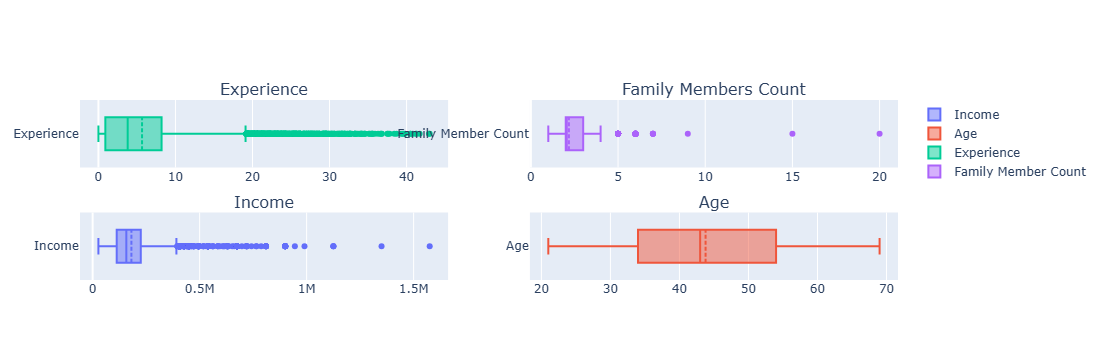

In [111]:
numerical_cols = ["Total_income","Age","Years_employed","Num_family"]
 
fig = make_subplots(rows=2, cols=2, start_cell="bottom-left",
                   subplot_titles=("Income", "Age", "Experience", "Family Members Count"))
 
fig.add_trace(go.Box(x=new_df.Total_income, name='Income',boxmean=True),row=1,col=1)
fig.add_trace(go.Box(x=new_df.Age, name='Age', boxmean=True), row=1, col=2)
fig.add_trace(go.Box(x=new_df.Years_employed, name='Experience', boxmean=True), row=2, col=1)
fig.add_trace(go.Box(x=new_df.Household_Size, name="Family Member Count", boxmean=True),row=2, col=2)


fig.show()


In [118]:
new_df.drop(new_df[(new_df["Household_Size"]>=20)].index, axis= 0, inplace=True)

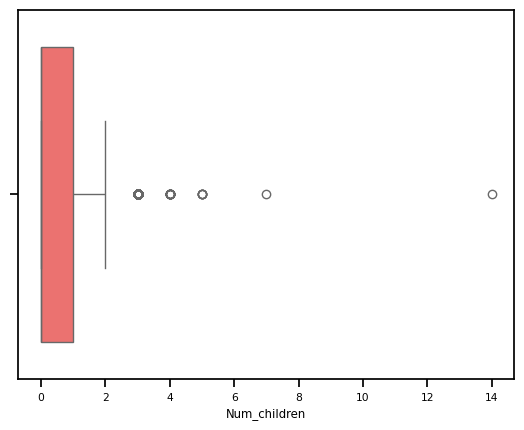

In [119]:
sns.boxplot(x=new_df["Num_children"]);

In [121]:
new_df[(new_df['Num_children']==7)]

,ID,Gender,Own_car,Own_property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,Work_phone,Phone,Email,Occupation_type,Num_family,Target,Account_length,Age,Unemployed,Years_employed,Is_Working,Marital_status,Household_Size
8094,5118330,0,1,1,7,157500.0,Working,Secondary,Married,House / apartment,1,1,0,Cleaning staff,9.0,1,26,38.0,0,4.5,1,1,9


In [122]:
new_df.columns

Index(['ID', 'Gender', 'Own_car', 'Own_property', 'Num_children',
       'Total_income', 'Income_type', 'Education_type', 'Family_status',
       'Housing_type', 'Work_phone', 'Phone', 'Email', 'Occupation_type',
       'Num_family', 'Target', 'Account_length', 'Age', 'Unemployed',
       'Years_employed', 'Is_Working', 'Marital_status', 'Household_Size'],
      dtype='object')

In [124]:
new_df = new_df.loc[:,['ID', 'Gender', 'Own_car', 'Own_property', 'Num_children',
       'Total_income', 'Income_type', 'Education_type', 'Family_status',
       'Housing_type', 'Work_phone', 'Phone', 'Email', 'Occupation_type',
       'Num_family',  'Account_length', 'Age', 'Unemployed',
       'Years_employed', 'Is_Working', 'Marital_status', 'Household_Size','Target']]

In [125]:
new_df.drop(["ID"],axis=1, inplace=True)

In [127]:
new_df.drop(["Email"],axis=1, inplace=True)

In [128]:
new_df.drop(["Phone"],axis=1, inplace=True)

In [129]:
new_df.drop(["Work_phone"],axis=1, inplace=True)

In [130]:
new_df.drop(["Unemployed"],axis=1, inplace=True)

In [131]:
new_df.head()

,Gender,Own_car,Own_property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Num_family,Account_length,Age,Years_employed,Is_Working,Marital_status,Household_Size,Target
0,1,0,0,0,427500.0,Working,Higher education,Civil marriage,House / apartment,Other,2.0,15,33.0,12.4,1,1,2,1
1,1,0,0,0,112500.0,Working,Secondary,Married,House / apartment,Security staff,2.0,29,59.0,3.1,1,1,2,0
2,0,1,0,0,270000.0,Commercial associate,Secondary,Single / not married,House / apartment,Sales staff,1.0,4,52.0,8.4,1,0,1,0
3,0,1,0,0,283500.0,Pensioner,Higher education,Separated,House / apartment,Other,1.0,20,62.0,0.0,1,0,1,0
4,1,0,0,0,270000.0,Working,Higher education,Married,House / apartment,Accountants,2.0,5,46.0,2.1,1,1,2,0


In [133]:
new_df.shape

(9708, 18)

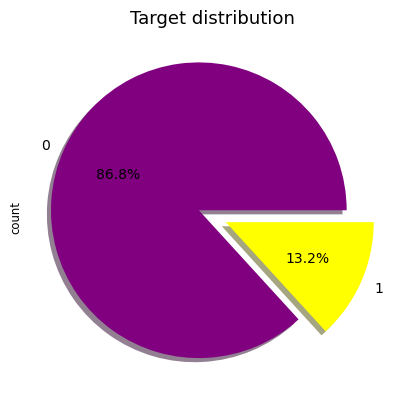

In [134]:
new_df['Target'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=['purple', 'yellow'],textprops = {'fontsize':10}).set_title("Target distribution")
 
plt.show()

In [136]:
colname = []
for x in new_df.columns:
    if new_df[x].dtypes == "object" :
        colname.append(x)

colname


['Income_type',
 'Education_type',
 'Family_status',
 'Housing_type',
 'Occupation_type']

In [138]:
#to check if there are any special characters in place of values
for i in new_df.columns:
    print({i:new_df[i].unique()})

{'Gender': array([1, 0], dtype=int64)}
{'Own_car': array([0, 1], dtype=int64)}
{'Own_property': array([0, 1], dtype=int64)}
{'Num_children': array([ 0,  1,  3,  2,  4,  5, 14,  7], dtype=int64)}
{'Total_income': array([ 427500. ,  112500. ,  270000. ,  283500. ,  135000. ,  130500. ,
        157500. ,  405000. ,  211500. ,  360000. ,  126000. ,  315000. ,
        247500. ,  297000. ,  225000. ,  166500. ,  216000. ,  255150. ,
        148500. ,  202500. ,   94500. ,  450000. ,  180000. ,   90000. ,
        765000. ,  382500. ,  144000. ,  229500. ,  292500. ,   74250. ,
         40500. ,  337500. ,  193500. ,  267750. ,  139500. ,   67500. ,
        252000. ,  900000. ,  115290. ,  279000. ,   76500. ,  234000. ,
         81000. ,  108000. ,   99000. ,  198000. ,   45000. ,  238500. ,
        117000. ,  153000. , 1350000. ,  445500. ,  495000. ,   85500. ,
        306000. ,  562500. ,  189000. ,  328500. ,  310500. ,  540000. ,
        171000. ,  675000. ,  121500. ,   72000. ,   65250

# convert catgerocial data into numerical

In [139]:
from sklearn.preprocessing import LabelEncoder
 
le=LabelEncoder()
 
for x in colname:
    new_df[x]=le.fit_transform(new_df[x])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)

Feature Income_type
mapping {'Commercial associate': 0, 'Pensioner': 1, 'State servant': 2, 'Student': 3, 'Working': 4}
Feature Education_type
mapping {'Academic degree': 0, 'Higher education': 1, 'Secondary': 2}
Feature Family_status
mapping {'Civil marriage': 0, 'Married': 1, 'Separated': 2, 'Single / not married': 3, 'Widow': 4}
Feature Housing_type
mapping {'House / apartment': 0, 'With parents': 1}
Feature Occupation_type
mapping {'Accountants': 0, 'Cleaning staff': 1, 'Cooking staff': 2, 'Core staff': 3, 'Drivers': 4, 'HR staff': 5, 'High skill tech staff': 6, 'IT staff': 7, 'Laborers': 8, 'Low-skill Laborers': 9, 'Managers': 10, 'Medicine staff': 11, 'Other': 12, 'Private service staff': 13, 'Realty agents': 14, 'Sales staff': 15, 'Secretaries': 16, 'Security staff': 17, 'Waiters/barmen staff': 18}


In [140]:
new_df.dtypes

Gender               int64
Own_car              int64
Own_property         int64
Num_children         int64
Total_income       float64
Income_type          int32
Education_type       int32
Family_status        int32
Housing_type         int32
Occupation_type      int32
Num_family         float64
Account_length       int64
Age                float64
Years_employed     float64
Is_Working           int64
Marital_status       int64
Household_Size       int64
Target               int32
dtype: object

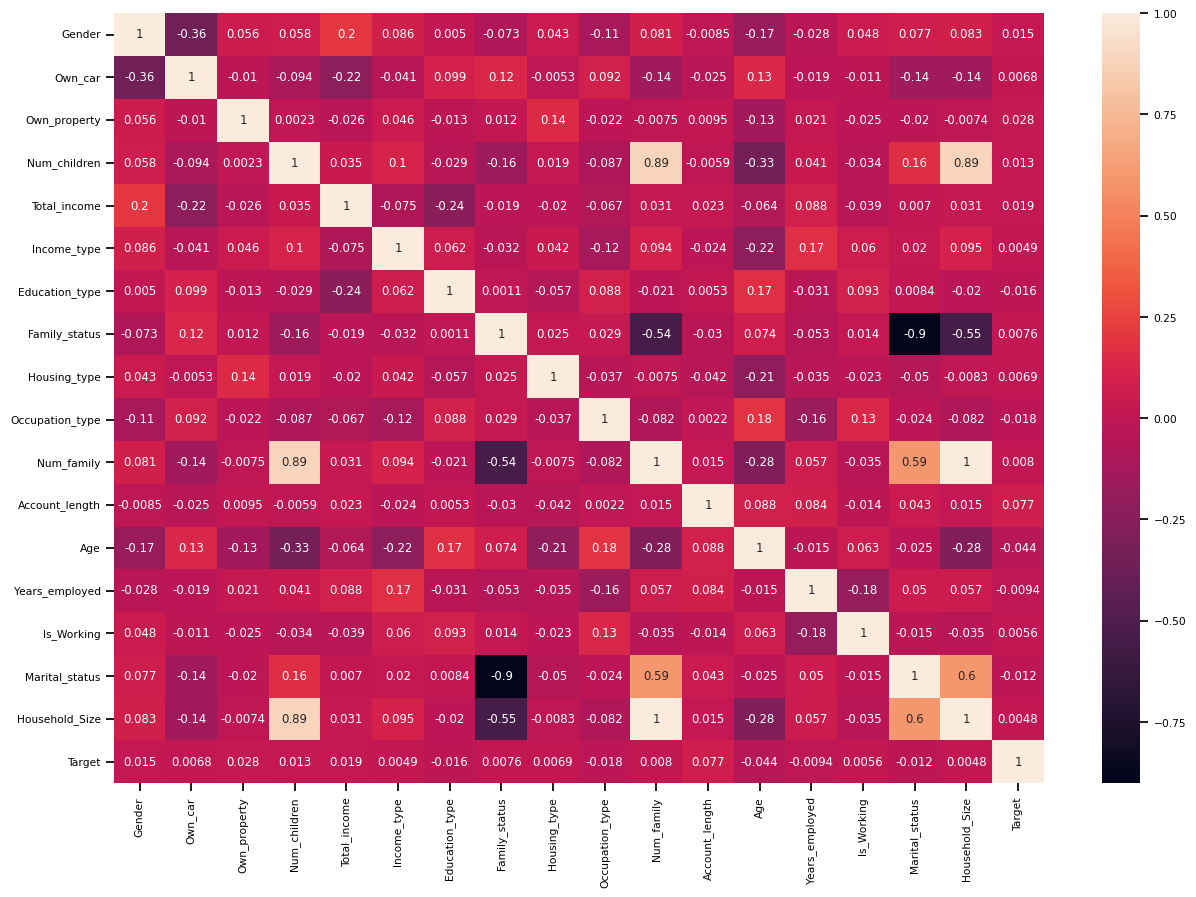

In [141]:
plt.figure(figsize=(15,10))
corr=new_df.corr()
sns.heatmap(corr,annot=True)
plt.show();

In [ ]:
new_df.drop("Num_childeren", axis=1, inplace=True)

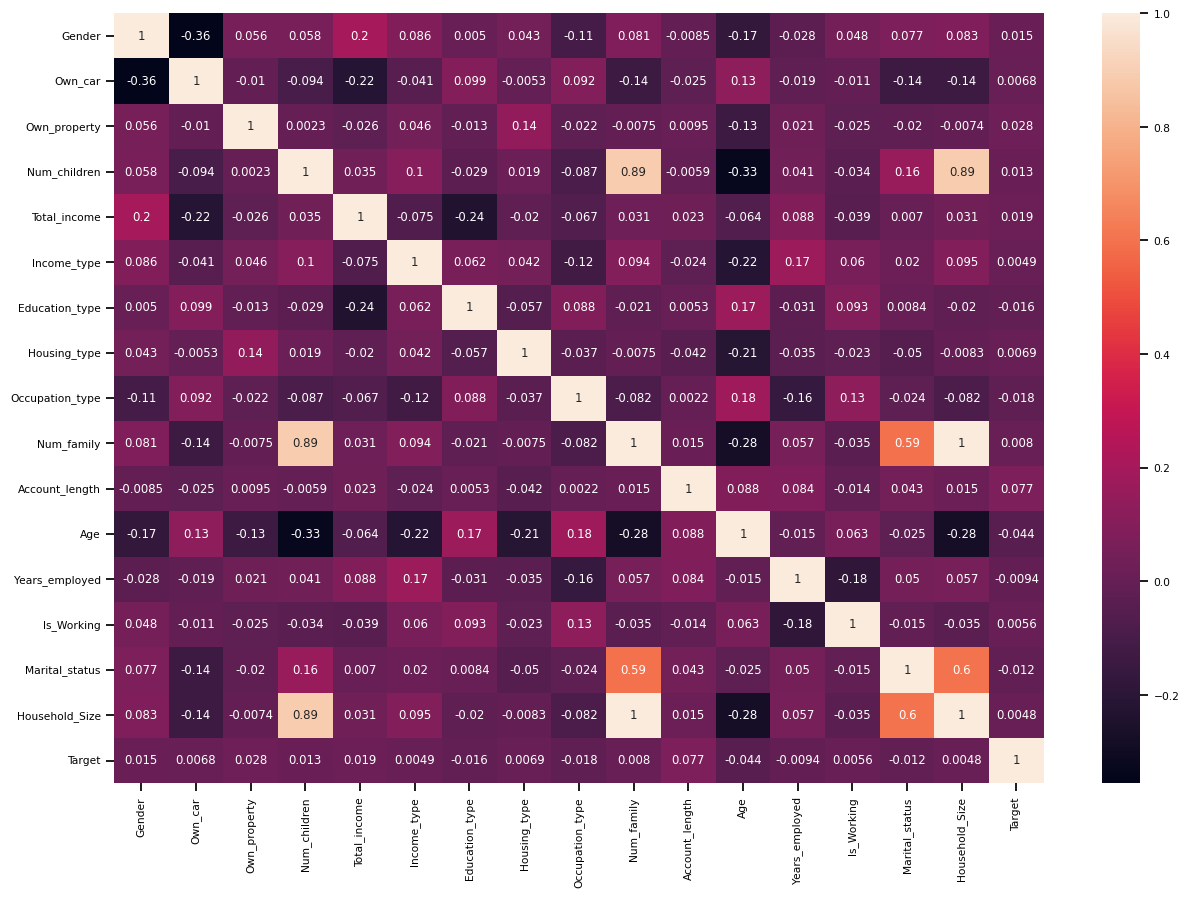

In [145]:
plt.figure(figsize=(15,10))
corr=new_df.corr()
sns.heatmap(corr,annot=True)
plt.show();

In [144]:
new_df.drop("Family_status", axis=1, inplace=True)

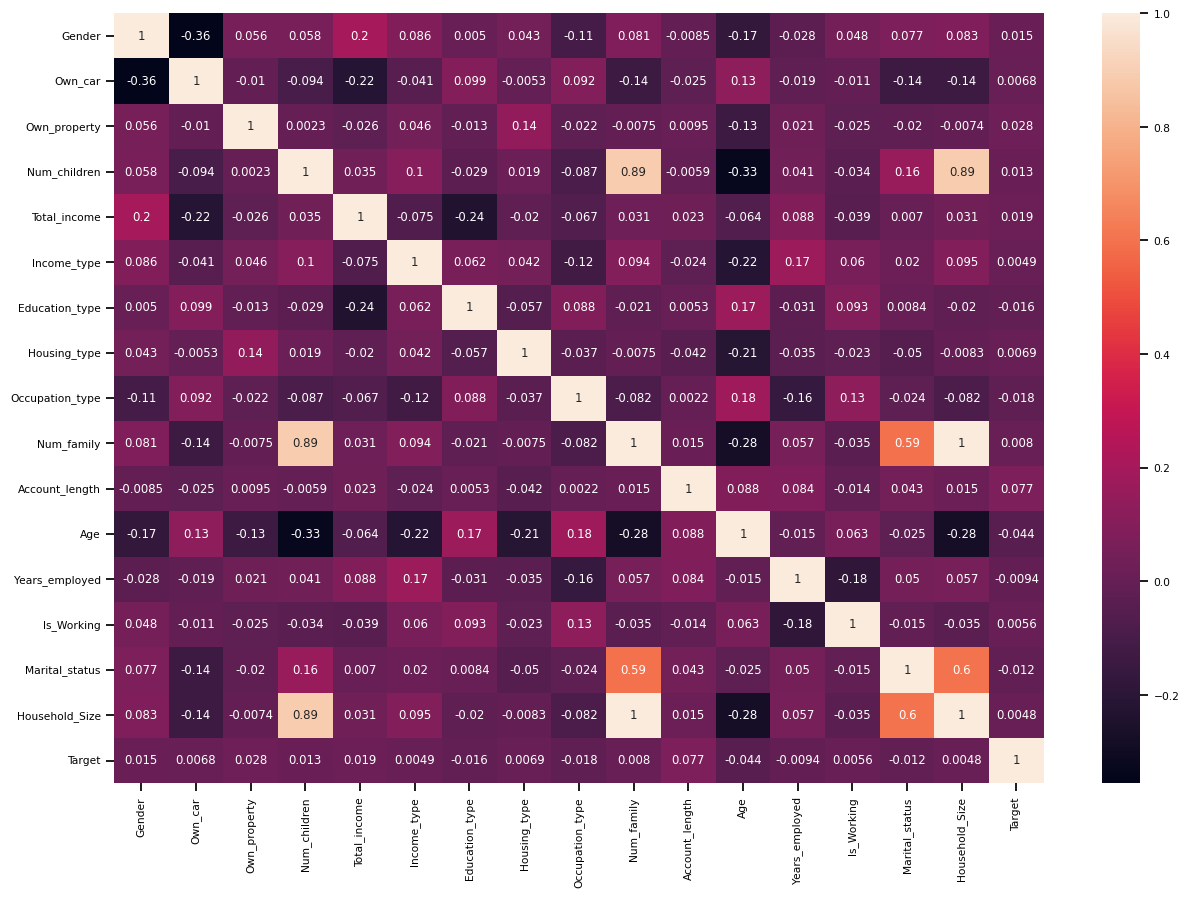

In [146]:
plt.figure(figsize=(15,10))
corr=new_df.corr()
sns.heatmap(corr,annot=True)
plt.show();

In [148]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9708 entries, 0 to 9708
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           9708 non-null   int64  
 1   Own_car          9708 non-null   int64  
 2   Own_property     9708 non-null   int64  
 3   Num_children     9708 non-null   int64  
 4   Total_income     9708 non-null   float64
 5   Income_type      9708 non-null   int32  
 6   Education_type   9708 non-null   int32  
 7   Housing_type     9708 non-null   int32  
 8   Occupation_type  9708 non-null   int32  
 9   Num_family       9708 non-null   float64
 10  Account_length   9708 non-null   int64  
 11  Age              9708 non-null   float64
 12  Years_employed   9708 non-null   float64
 13  Is_Working       9708 non-null   int64  
 14  Marital_status   9708 non-null   int64  
 15  Household_Size   9708 non-null   int64  
 16  Target           9708 non-null   int32  
dtypes: float64(4), int3

# Creating X & Y variables for predictions

In [155]:
#create X & Y
X = new_df.iloc[:,0:-1]
Y = new_df.iloc[:,-1]

In [156]:
print(X.shape)
print(Y.shape)

(9708, 15)
(9708,)


In [153]:
new_df.drop("Household_Size", axis=1, inplace=True)

In [154]:
new_df.columns

Index(['Gender', 'Own_car', 'Own_property', 'Num_children', 'Total_income',
       'Income_type', 'Education_type', 'Housing_type', 'Occupation_type',
       'Num_family', 'Account_length', 'Age', 'Years_employed', 'Is_Working',
       'Marital_status', 'Target'],
      dtype='object')

# Scaling of the data 

As ther are different features variables in X, it can have a prossibility of giving more importance to the variables having greater range and gives less important to variabales having small range which is not suitable.
so to overcome this problem scaling is done on all the variables in X, as it will bring all the variables in same range.

In [158]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [159]:
from sklearn.model_selection import train_test_split
#<1000=in range of 80-20 & >1000= in range of 70-30

#split the data into test and train
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=10)

In [161]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(7766, 15)
(7766,)
(1942, 15)
(1942,)


# Logistic Regression

In [162]:
from sklearn.linear_model import LogisticRegression
#create a model
classifier= LogisticRegression(random_state=10)
#fitting training data to the model
classifier.fit(X_train,Y_train)

Y_pred = classifier.predict(X_test)

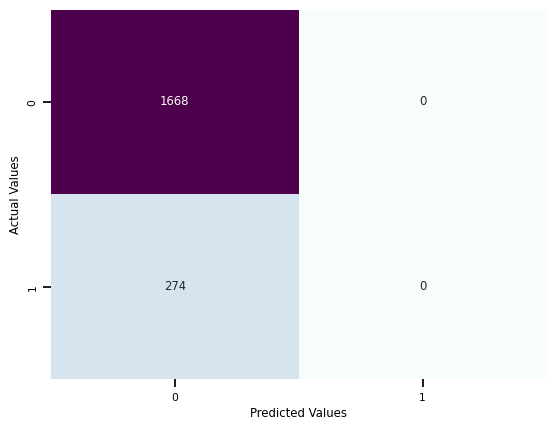

Classification report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1668
           1       0.00      0.00      0.00       274

    accuracy                           0.86      1942
   macro avg       0.43      0.50      0.46      1942
weighted avg       0.74      0.86      0.79      1942

Accuracy of the model:  0.858908341915551


In [163]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()
 
print("Classification report:")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

# KNN

In [164]:
#predicting using the KNeighbors_Classifier
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))),
                              metric="euclidean")

#euclidean,manhattan,minkowski
#fit the model on the data and predict the values
model_KNN.fit(X_train,Y_train)

Y_pred=model_KNN.predict(X_test)

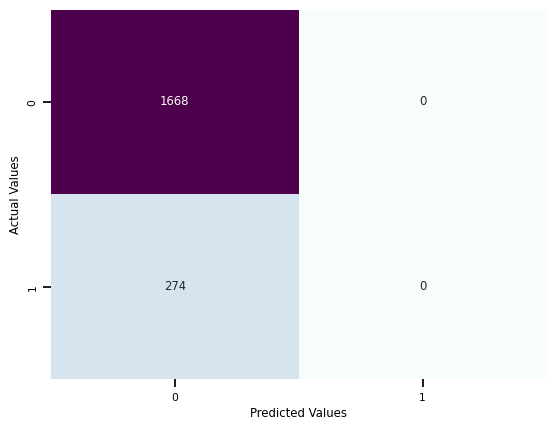

Classification report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1668
           1       0.00      0.00      0.00       274

    accuracy                           0.86      1942
   macro avg       0.43      0.50      0.46      1942
weighted avg       0.74      0.86      0.79      1942

Accuracy of the model:  0.858908341915551


In [165]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()
 
print("Classification report:")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

# Decision tree

In [168]:
from sklearn.tree import DecisionTreeClassifier
#create the model
model_DT=DecisionTreeClassifier (random_state=10,
                                criterion="entropy")
#min_sample_leaf, min_samples_split, max_depth, max_features, max_leaf_nodes
#it can take criterion = gini/Entropy

#fitting training data to the model
model_DT.fit(X_train, Y_train)
Y_pred=model_DT.predict(X_test)#used to predict on the value on the x test values
print(list(zip(Y_test,Y_pred)))


[(0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 1), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (1, 0), (0, 1), (0, 1), (0, 0), (0, 0), (1, 0), (0, 0), (0, 1), (0, 1),

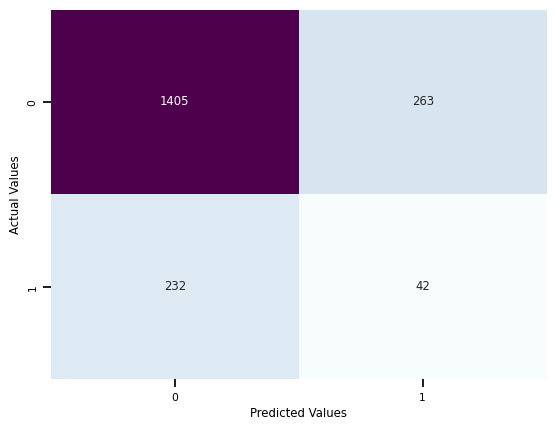

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1668
           1       0.14      0.15      0.15       274

    accuracy                           0.75      1942
   macro avg       0.50      0.50      0.50      1942
weighted avg       0.76      0.75      0.75      1942

Accuracy of the model:  0.7451081359423275


In [169]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()
 
print("Classification report:")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

# Random Forst

In [180]:
#Predicting using the Random_Forest_Classifier
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(n_estimators=69,
                                         random_state=10, bootstrap=True,
                                         n_jobs=-1)

#fit the model on the data and predict the values
model_RandomForest.fit(X_train,Y_train)

Y_pred=model_RandomForest.predict(X_test)

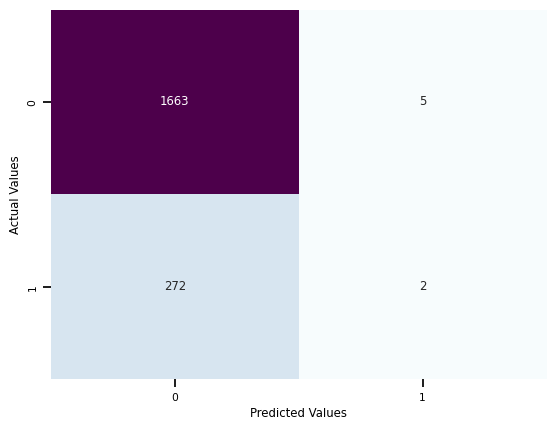

Classification report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1668
           1       0.29      0.01      0.01       274

    accuracy                           0.86      1942
   macro avg       0.57      0.50      0.47      1942
weighted avg       0.78      0.86      0.79      1942

Accuracy of the model:  0.8573635427394438


In [181]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()
 
print("Classification report:")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [182]:
y = new_df["Target"]
x = new_df.drop(["Target"],axis=1)

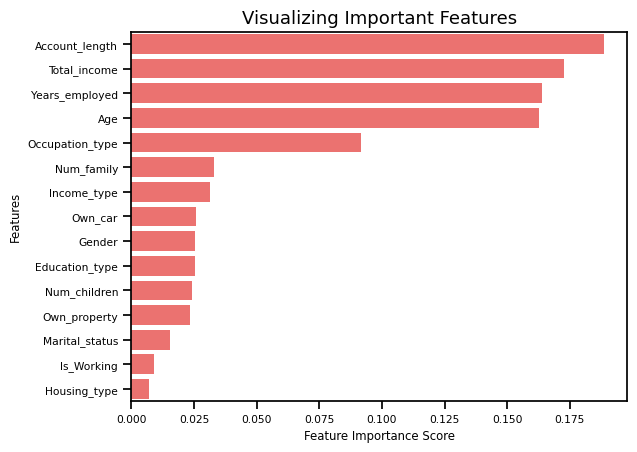

In [183]:
feature_imp = pd.Series(model_RandomForest.feature_importances_,index=x.columns.tolist()).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [184]:
new_df.drop(["Own_car"],axis=1,inplace=True)

In [185]:
new_df.drop(["Own_property"],axis=1,inplace=True)

In [186]:
new_df.drop(["Housing_type"],axis=1,inplace=True)

In [190]:
#create X & Y
X = new_df.iloc[:,0:-1]
Y = new_df.iloc[:,-1]

In [191]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [192]:
from sklearn.model_selection import train_test_split
#<1000=in range of 80-20 & >1000= in range of 70-30

#split the data into test and train
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=10)

In [201]:
#Predicting using the Random_Forest_Classifier
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(n_estimators=3,
                                         random_state=10, bootstrap=True,
                                         n_jobs=-1)

#fit the model on the data and predict the values
model_RandomForest.fit(X_train,Y_train)

Y_pred=model_RandomForest.predict(X_test)

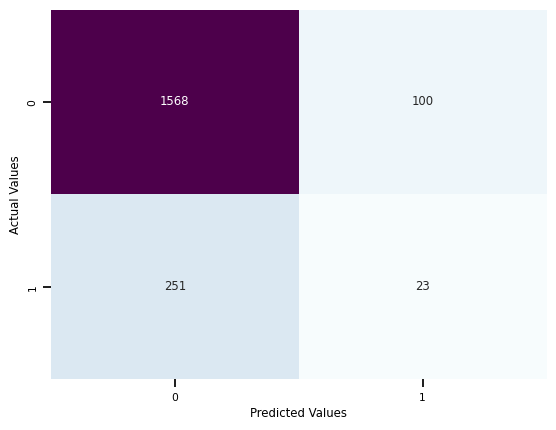

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1668
           1       0.19      0.08      0.12       274

    accuracy                           0.82      1942
   macro avg       0.52      0.51      0.51      1942
weighted avg       0.77      0.82      0.79      1942

Accuracy of the model:  0.8192584963954685


In [202]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()
 
print("Classification report:")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

# Extra Trees

In [204]:
#Predicting using the Random_Forest_Classifier
from sklearn.ensemble import ExtraTreesClassifier

model_ExtraTrees=ExtraTreesClassifier(n_estimators=3,
                                         random_state=10, bootstrap=True,
                                         n_jobs=-1)

#fit the model on the data and predict the values
model_ExtraTrees.fit(X_train,Y_train)

Y_pred=model_ExtraTrees.predict(X_test)

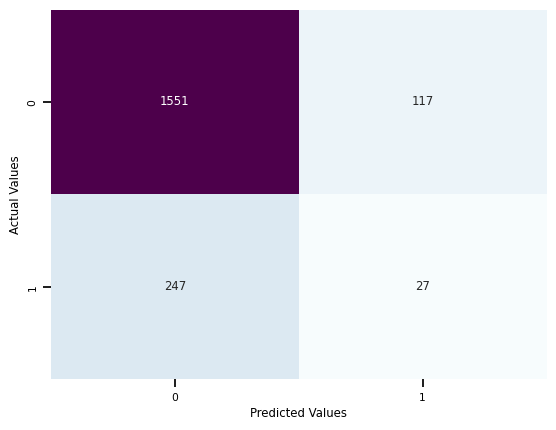

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1668
           1       0.19      0.10      0.13       274

    accuracy                           0.81      1942
   macro avg       0.53      0.51      0.51      1942
weighted avg       0.77      0.81      0.79      1942

Accuracy of the model:  0.8125643666323378


In [205]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()
 
print("Classification report:")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)